# This notebook is for exploring the KiDS data and working through a few examples of TESSCut data to produce LCs and single-pixel images

### Some important links:
#### TESS MAST tutorial:  https://outerspace.stsci.edu/display/TESS/6.1.6+-+Searching+For+And+Retrieving+TESS+Mission+Products
#### MAST search: https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightkurve as lk
import astropy.units as u
import astropy.coordinates as SkyCoord

In [2]:
data = pd.read_csv('KiDS_lenses.csv',skiprows=8) # have to skip rows of text at start of the file
data.keys()

Index(['ID', 'score', 'P1', 'P3', 'RA', 'DEC', 'DISC'], dtype='object')

#### DISC: 0 = Newly discovered candidate ; 1 = Confirmed lens ; 2 = SuGOHI lens candidate

Text(0.5, 1.0, 'Lens Scores in KiDS')

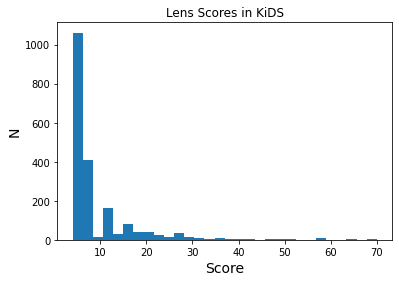

In [3]:
score = data['score'].values
plt.hist(score,bins=30)
plt.xlabel('Score',fontsize=14)
plt.ylabel('N',fontsize=14)
plt.title('Lens Scores in KiDS')

Text(0.5, 1.0, 'Sky Pos. of KiDS Lens Candidates with DISC Scores')

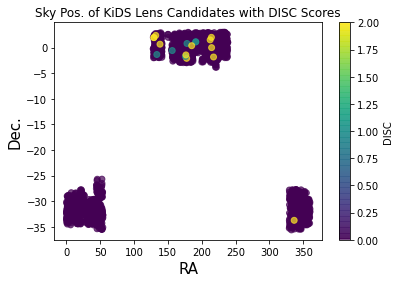

In [4]:
DISC = data['DISC']
RA = data['RA']
dec = data['DEC']
plt.scatter(RA,dec,c=DISC,cmap='viridis',alpha=0.7)
plt.xlabel('RA',fontsize=15)
plt.ylabel('Dec.',fontsize=15)
plt.colorbar(label='DISC')
plt.title('Sky Pos. of KiDS Lens Candidates with DISC Scores')

In [5]:
ID = data['ID']
print('Confirmed lenses:')
skypos_list = []
n = 0
for i in range(len(DISC)):
    if DISC[i]==1:
        print('ID: ',ID[i],'\t RA,Dec: ',RA[i],dec[i])
        skypos_list.append(f'{RA[i]} {dec[i]}')
        n+=1
print('\n Total: ',n)

Confirmed lenses:
ID:  51 	 RA,Dec:  178.21776 0.79257
ID:  1642 	 RA,Dec:  175.87355 -1.74164
ID:  2558 	 RA,Dec:  133.69397 -1.36032
ID:  1335 	 RA,Dec:  191.21255 1.11223
ID:  568 	 RA,Dec:  191.21394 1.11198
ID:  2890 	 RA,Dec:  156.46391 -0.58812

 Total:  6


In [6]:
# While using MAST query:
# No TESS data for ID #s: 51, 1642, 1335, 568
# Retrieved MAST data product for ID #s: 2558, 2890

# Should we search for TESS data products for ALL the candidates? --> yes, eventually. Get it working first

In [7]:
for pos in skypos_list:
    lk.search_targetpixelfile(pos,cadence='long')

No data found for target "178.21776 0.79257".
No data found for target "175.87355 -1.74164".
No data found for target "133.69397 -1.36032".
No data found for target "191.21255 1.11223".
No data found for target "191.21394 1.11198".
No data found for target "156.46391 -0.58812".


In [8]:
# get full frame lc for single pixel focused on the target (see Scott's notebook)

In [ ]:
# don't use lightkurve!...

In [12]:
from astropy.io import fits
import os
os.listdir('/Users/waderoemer/Desktop/MScThesis/astrocut_333')

['tess-s0028-1-2_333.412570_-33.198980_1x1_astrocut.fits',
 'tess-s0001-1-2_333.412570_-33.198980_1x1_astrocut.fits']

In [21]:
directory = '/Users/waderoemer/Desktop/MScThesis'
file = 'astrocut_333/tess-s0028-1-2_333.412570_-33.198980_1x1_astrocut.fits'
filepath = f'{directory}/{file}'
fits.info(filepath)

Filename: /Users/waderoemer/Desktop/MScThesis/astrocut_333/tess-s0028-1-2_333.412570_-33.198980_1x1_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   3464R x 12C   [D, E, J, 1J, 1E, 1E, 1E, 1E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        81   (1, 1)   int32   


In [22]:
tphdu = fits.open(filepath)

In [25]:
tphdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '1J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(1, 1)'
    name = 'FLUX'; format = '1E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(1, 1)'
    name = 'FLUX_ERR'; format = '1E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(1, 1)'
    name = 'FLUX_BKG'; format = '1E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(1, 1)'
    name = 'FLUX_BKG_ERR'; format = '1E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(1, 1)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'FFI_FILE'; format = '38A'; unit = 'pixel'
)

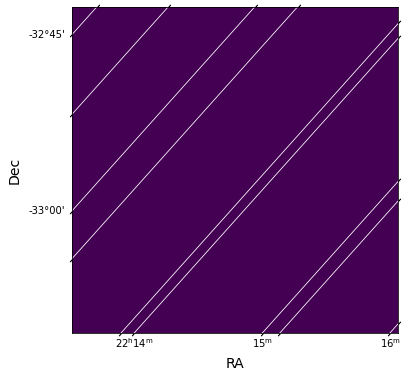

In [35]:
from astropy.wcs import WCS

#flux = tphdu[1].columns['FLUX']
tpf_data = tphdu[1].data
first_image = tpf_data['FLUX'][1]

wcs = WCS(tphdu[2].header)

fig = plt.figure(figsize = (6,6))
fig.add_subplot(111, projection = wcs)
plt.imshow(first_image, origin = 'lower', cmap = plt.cm.viridis)
plt.xlabel('RA', fontsize = 14)
plt.ylabel('Dec', fontsize = 14)
plt.grid(axis = 'both', color = 'white', ls = 'solid')

In [60]:
#tpf_data['FLUX']
# *sigh* ... these flux values are stored as double nested np arrays... use a loop to extract them.
# I think they are stored this way because each nested array would normally contain data for multiple pixels
# at a given timestamp, but we have extracted data for only one pixel so this is what it looks like
flux = []
for i in range(len(tpf_data['FLUX'])):
    flux_i = tpf_data['FLUX'][i][0][0]
    flux.append(flux_i)
len(flux)
timebin = tpf_data['TIME'][11]-tpf_data['TIME'][10] # in days
timebin_min = timebin * 24 * 60 # convert to min
timebin_min

10.000286617068923

In [ ]:
# why is this not 30min? ^

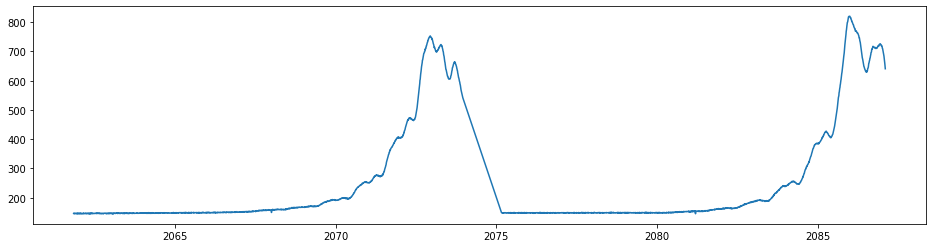

In [57]:
plt.figure(figsize=[16,4])
plt.plot(tpf_data['TIME'],flux)

In [49]:
# interesting ^ ...
# now let's try this with a few more objects, then start a new notebook to begin writing code to
# handle all of the data (which I still need to get...)